# **Importing All Necessary Libraries**

In [1]:
#Importing all dependencies and Seaborn itself
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# **Data Loading**

In [2]:
df = pd.read_csv('flight_price.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# Check data shape
df.shape

(10683, 11)

In [4]:
# Check null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
# Identify rows with any null values
rows_with_nulls = df[df.isnull().any(axis=1)]

# Get the row indices with null values
row_indices_with_nulls = rows_with_nulls.index

# Print row indices with null values
print("Row indices with null values:")
print(row_indices_with_nulls)

# Print rows with null values (optional)
print("\nRows with null values:")
print(rows_with_nulls)

Row indices with null values:
Index([9039], dtype='int64')

Rows with null values:
        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480  


In [6]:
# Drop rows with any null values
df = df.dropna()

# **Plotting histograms to get the counts**

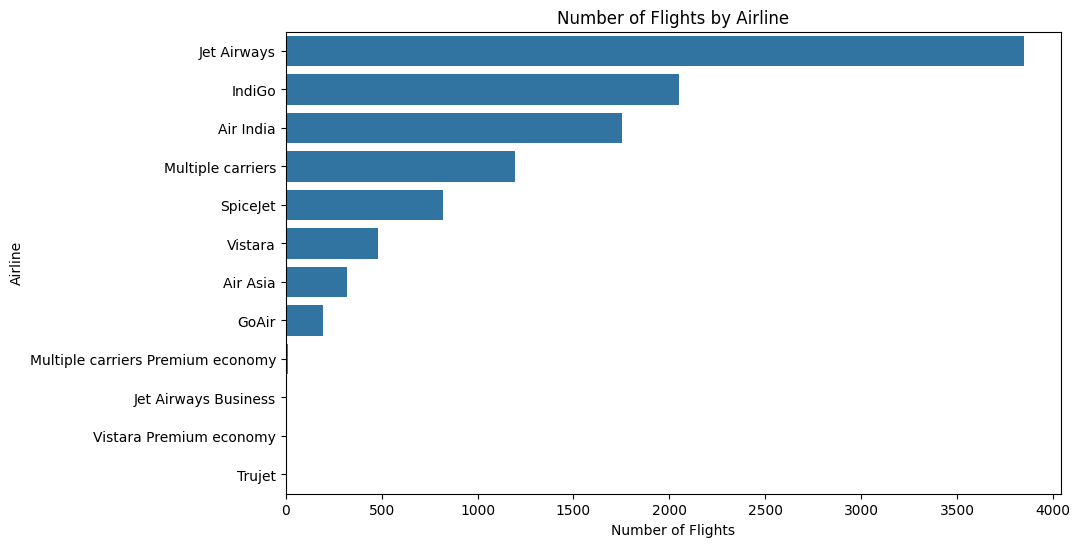

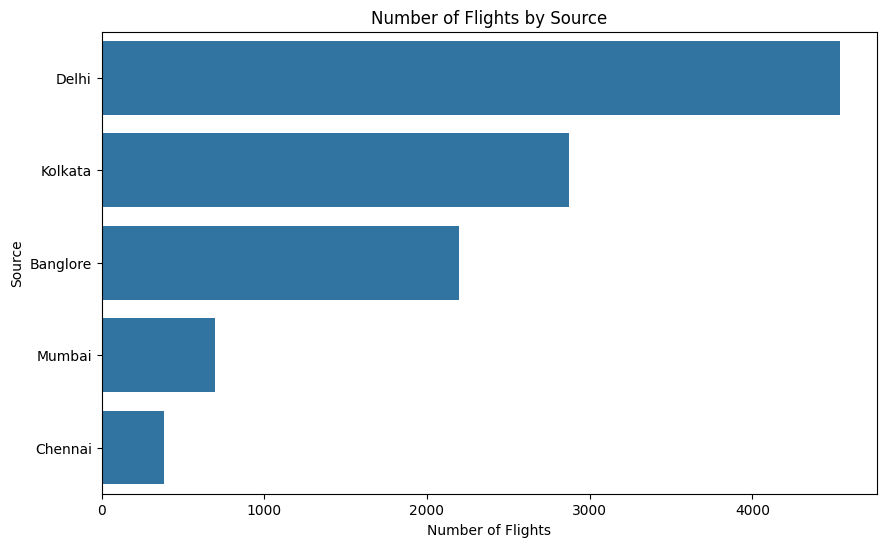

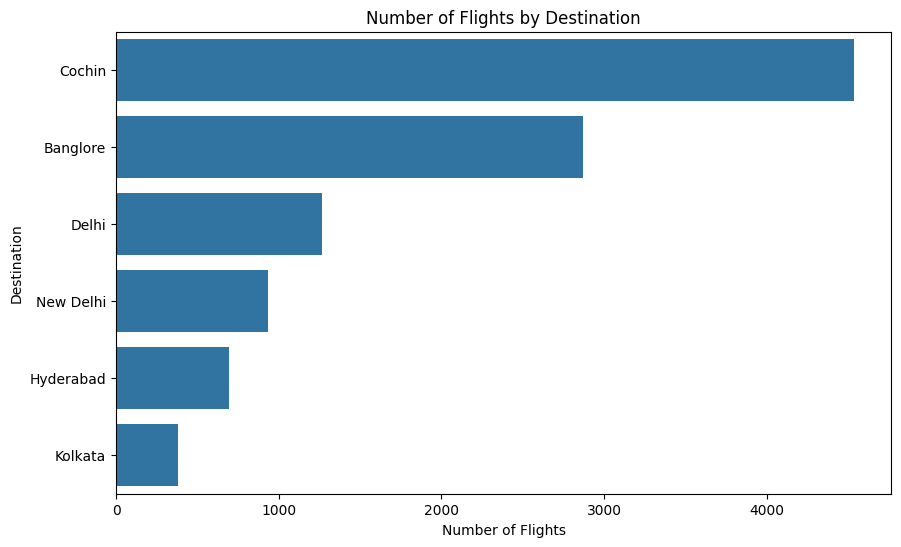

In [7]:
def plot_histogram(column_name, data):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[column_name], order=data[column_name].value_counts().index)
    plt.title(f'Number of Flights by {column_name}')
    plt.xlabel('Number of Flights')
    plt.ylabel(column_name)
    plt.show()

# Plot for "Airline"
plot_histogram('Airline', df)

# Plot for "Source"
plot_histogram('Source', df)

# Plot for "Destination"
plot_histogram('Destination', df)

# **Converting Date of Journey & Departure Time to standard date time format for ease**

In [8]:
# Convert 'Date_of_Journey' to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Convert 'Date_of_Journey' to ISO 8601 format
df['Date_of_Journey'] = df['Date_of_Journey'].dt.strftime('%Y-%m-%d')

# Convert Dep_Time to standard format
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.strftime('%H:%M')

# Display the DataFrame to verify the changes
print(df.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR ? DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


# **Separting date from Arrival Time Column to read it in standard format**

In [9]:
# Function to extract time and date from Arrival_Time
def extract_time_and_date(arrival_time):
    parts = arrival_time.split()
    if len(parts) > 1:  # Time and date are present
        time_part = parts[0]
        date_part = ' '.join(parts[1:])
        return time_part, date_part
    else:  # Only time is present
        time_part = parts[0]
        return time_part, None

# Apply the function to extract time and date
df['Arrival_Time'], df['Arrival_Date'] = zip(*df['Arrival_Time'].apply(extract_time_and_date))

# Print the standardized DataFrame
print(df.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR ? DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20        01:10   2h 50m    non-stop         No info   3897   
1    05:50        13:15   7h 25m     2 stops         No info   7662   
2    09:25        04:25      19h     2 stops         No info  13882   
3    18:05        23:30   5h 25m      1 stop         No info   6218   
4    16:50        21:35   4h 45m      1 stop         No info  13302   

  Arrival_Date  
0       22 Mar  
1         None  
2       10 Jun  
3         None  
4         Non

# **Converting Arrival Date into standard date time format for simplicity**

In [10]:
# Extract year from Date_of_Journey
df['Year'] = pd.to_datetime(df['Date_of_Journey'], format='%Y-%m-%d').dt.year

# Function to combine Arrival_Date with year
def combine_date_with_year(arrival_date, year):
    if arrival_date is not None:
        return pd.to_datetime(f"{arrival_date} {year}", format='%d %b %Y').strftime('%Y-%m-%d')
    else:
        return None

# Apply the function to combine Arrival_Date with the extracted year
df['Arrival_Date'] = df.apply(lambda row: combine_date_with_year(row['Arrival_Date'], row['Year']), axis=1)

# Drop the Year column as it's no longer needed
df.drop(columns=['Year'], inplace=True)

# Print the standardized DataFrame
print(df.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR ? DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20        01:10   2h 50m    non-stop         No info   3897   
1    05:50        13:15   7h 25m     2 stops         No info   7662   
2    09:25        04:25      19h     2 stops         No info  13882   
3    18:05        23:30   5h 25m      1 stop         No info   6218   
4    16:50        21:35   4h 45m      1 stop         No info  13302   

  Arrival_Date  
0   2019-03-22  
1         None  
2   2019-06-10  
3         None  
4         Non

# **Converting duration column into seconds**

In [11]:
# Function to convert Duration to seconds
def duration_to_seconds(duration):
    time_parts = duration.split()
    hours = 0
    minutes = 0
    for part in time_parts:
        if 'h' in part:
            hours = int(part.replace('h', ''))
        elif 'm' in part:
            minutes = int(part.replace('m', ''))
    total_seconds = hours * 3600 + minutes * 60
    return total_seconds

# Apply the function to the 'Duration' column
df['Duration'] = df['Duration'].apply(duration_to_seconds)

# Display the DataFrame to verify the changes
print(df.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR ? DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time Arrival_Time  Duration Total_Stops Additional_Info  Price  \
0    22:20        01:10     10200    non-stop         No info   3897   
1    05:50        13:15     26700     2 stops         No info   7662   
2    09:25        04:25     68400     2 stops         No info  13882   
3    18:05        23:30     19500      1 stop         No info   6218   
4    16:50        21:35     17100      1 stop         No info  13302   

  Arrival_Date  
0   2019-03-22  
1         None  
2   2019-06-10  
3         None  
4      

# **Converting price column into integer**

In [12]:
# Convert Price column to integers (assuming it's safe to do so)
df['Price'] = df['Price'].astype(int)
# Check the current data type and values of Price column
print(df['Price'].head())  # Print the first few rows to inspect the Price column
print(df['Price'].dtype)   # Check the current data type of the Price column

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int32
int32


# **Extracting Month from Date_of_Journey column for plotting**

In [13]:
# Convert Date_of_Journey to datetime format (if not already)
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

# Extract month as integer (1 for January, 2 for February, etc.)
df['Month'] = df['Date_of_Journey'].dt.month

# Check the current data type and values of Price column
print(df['Month'].head())  # Print the first few rows to inspect the Price column
print(df['Month'].dtype)   # Check the current data type of the Price column

0    3
1    5
2    6
3    5
4    3
Name: Month, dtype: int32
int32


# **Plotting Average Price increament Per Month**

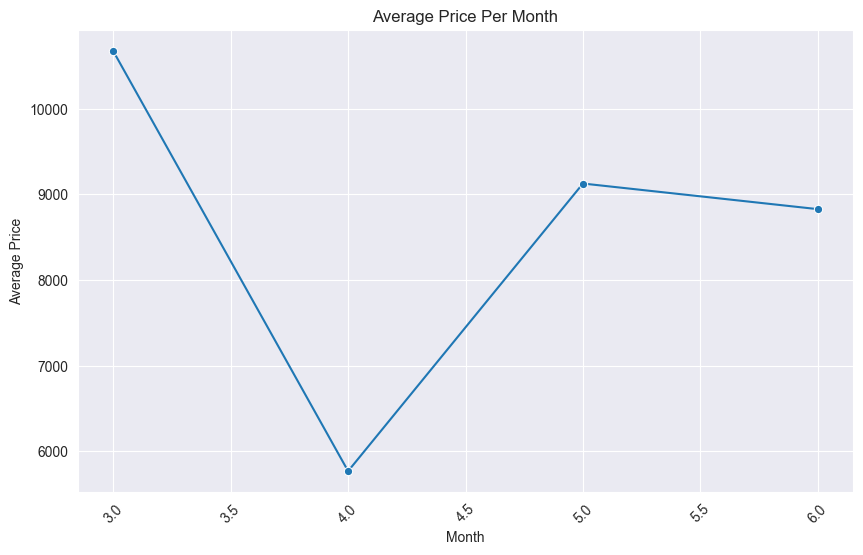

In [14]:
# Group by month and calculate the average price
monthly_avg_price = df.groupby('Month')['Price'].mean().reset_index()

# Plot the average price per month
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')  # Set the grid style to 'darkgrid'
sns.lineplot(x='Month', y='Price', data=monthly_avg_price, marker='o')
plt.title('Average Price Per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# **label encoding to all the columns which have textual data**

In [15]:
# List of columns to be label encoded
columns_to_encode = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column in the list
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the DataFrame to verify the changes
print(df.head())


   Airline Date_of_Journey  Source  Destination  Route Dep_Time Arrival_Time  \
0        3      2019-03-24       0            5     18    22:20        01:10   
1        1      2019-05-01       3            0     84    05:50        13:15   
2        4      2019-06-09       2            1    118    09:25        04:25   
3        3      2019-05-12       3            0     91    18:05        23:30   
4        3      2019-03-01       0            5     29    16:50        21:35   

   Duration  Total_Stops  Additional_Info  Price Arrival_Date  Month  
0     10200            4                8   3897   2019-03-22      3  
1     26700            1                8   7662         None      5  
2     68400            1                8  13882   2019-06-10      6  
3     19500            0                8   6218         None      5  
4     17100            0                8  13302         None      3  
